5. Section (1.1.3) Plot the error scaling in the Euler method for dy/dt = sin(y) with the following parameters:

    a.	Initial condition:  y[0] = 1;
    
    b.	Time interval: [0,2π]
    
Use the same time steps as in the Program 1.3. Label your curves as in Figure 1.5 using text 
Note: rename the function in program 1.8b as “derivs_spring”. This will distinguish from the other deriv function.


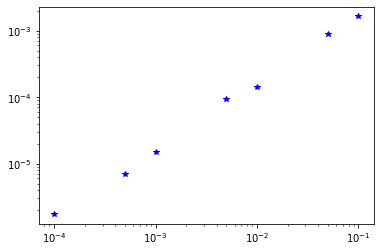

In [12]:
#Problem 5:

%matplotlib inline    
from numpy import *   
import matplotlib.pyplot as plt
from math import *

dt = (0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1) 

X = zeros((len(dt),2))

# Finding a very close solution by taking very small dt
dt0 = 1E-6
y_true = 1                            # initial condition 
time = 0.                         # set the time=0 
t_final = 2*pi                     # final time 
Nsteps = round(t_final/dt0)    # number of steps to take 
for i in range(Nsteps): 
    y_true = y_true + sin(y_true)*dt0          # extrapolate one time step 
    time = time + dt0      # increment time

for j in range(len(dt)): 
        y = 1                            # initial condition 
        time = 0.                         # set the time=0 
        Nsteps = round(t_final/dt[j])    # number of steps to take 
        
        for i in range(Nsteps): 
                y = y + sin(y)*dt[j]          # extrapolate one time step 
                time = time + dt[j]      # increment time
                
        X[j,1] = abs(y_true - y)       # compute the error and store 
        X[j,0] = dt[j]                   # store the time 
        
plt.loglog(X[:,0],X[:,1], 'b*')               # display on log-log plot
# print(X)


6.  Write a script (not a function) that does the following:

i. Initialize:  n_soln = 8; dt0 = 0.25; x0=1; v0 = 0; t_final = 3;
	x_f, v_f, and	dt_vec should all be zero vectors of length n
     
ii. Loop from  jj = 0 to n_soln-1
Compute the solutions of the mass-spring system using the Euler method with the initial conditions [x0 , v0] on the interval 0 < t < t_final with time step dt0/(2**jj).

In Figure 1, plot the position of each solution as a function of time. Plot each curve in a different color. There are several ways to do this. If someone finds a good way and is willing to share with the group, please send an email.

The title of this plot should be,  “Position as a function of time for mass-spring system, Euler’s method”. Put appropriate labels on the x and y axis.

In Figure 2, plot the velocity of each solution as a function of time.  The title of this plot should be,  “Velocity as a function of time for mass-spring system, Euler’s method”. Put appropriate labels on the x and y axis.

In Figure 3, plot the position of each solution on the x axis versus the velocity on the y-axis. Make again,  each curve has a different color. The title of this plot should be,  “Phase plot for solution of mass-spring system, Euler’s method”. Put appropriate labels on the x and y axis.

Store the final values of x(t_final) and v(t_final) in the vectors x_f and v_f, respectively.  (Note that the final values correspond to Y[-1,1] and Y[-1,2] respectively.)

Store the current time step in the vector dt_vec.
end loop

iii. Output:
In Figure 4, plot log2(dt_vec[:-1]) versus log2(abs(diff(x_f)))  (note that ‘diff’ is a numpy function that gives the vector of differences).  Title: “Position error scaling with step size for Euler method”. Put appropriate labels on the x and y axis.

In Figure 5, plot log2(dt_vec[:-1]) versus log2(abs(diff(v_f))).  Title: “Velocity error scaling with step size for Euler method”. Put appropriate labels on the x and y axis.


Log e as a funciton of log(dx)

##slope is 1

Theory tells us E = kdx

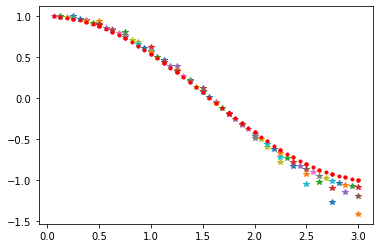

In [3]:
#Problem 6 (version 1, which plots point by point)

from numpy import *
from matplotlib.pyplot import *
%matplotlib inline

#part i:
#initialization

n_soln = 3
dt0 = 0.25
x0 = 1.0
v0 = 0.0
t_final = 3
x_f = zeros(n_soln)
v_f = zeros(n_soln)
dt_vec = zeros(n_soln)

#part ii:

for jj in range(n_soln): # find solutions for different values of dt
    dt = dt0/2**jj
    time1 = 0.0
    Nsteps = int(round(t_final/dt))
    y = array([x0,v0])
    dy = zeros(2)
    for i in range(Nsteps): # number of time steps to take
        dy[1] = -y[0] # Equation for dv/dt
        dy[0] = y[1] # Equation for dx/dt
        y = y + dt*dy # integrate both equations with Euler
        time1 = time1 + dt
        plot(time1,y[0],'*')
        plot(time1,cos(time1),'r.')
    
    

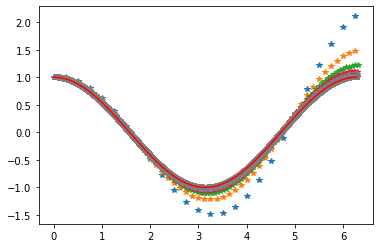

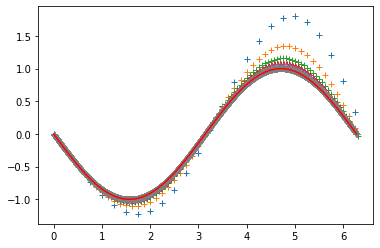

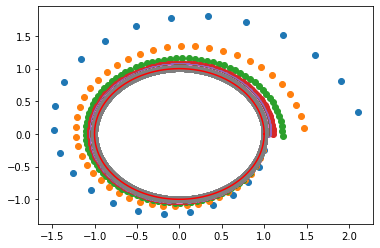

In [4]:
#Problem 6 (improved version, which plots 
# solution by solution)

from numpy import *
from matplotlib.pyplot import *
%matplotlib inline

#part i:
#initialization

n_soln = 8
dt0 = 0.25
x0 = 1.0
v0 = 0.0
t_final = 2 * np.pi
x_f = zeros(n_soln)
v_f = zeros(n_soln)
dt_vec = zeros(n_soln)

#part ii:

for jj in range(n_soln): # find solutions for different values of dt
    dt = dt0/2**jj
    Nsteps = int(round(t_final/dt))
    y0 = array([x0,v0])
    y = zeros((Nsteps+1,2))
    time1 = zeros(Nsteps+1)
    y[0,:] = y0
    dy = zeros(2)
    for i in range(Nsteps): # number of time steps to take
        dy[1] = -y[i,0] # Equation for dv/dt
        dy[0] = y[i,1] # Equation for dx/dt
        y[i+1,:] = y[i,:] + dt*dy # integrate both equations with Euler
        time1[i+1] = time1[i] + dt
    figure(1)
    plot(time1,y[:,0],'*')
    figure(2)
    plot(time1,y[:,1],'+')
    figure(3)
    plot(y[:,0],y[:,1],'o')
figure(1)
plot(time1,cos(time1),'r-')
figure(2)    
plot(time1,-sin(time1),'r-')
figure(3)
plot(cos(time1),-sin(time1),'r-')

    

## Exercises, due 10/15 at 11:59 pm ##

Make a copy of the previous code, and make the following changes:

- The title of Figure 1 should be, “Position as a function of time for mass-spring system, Euler’s method”. Put appropriate labels on the x and y axis.
- The title of Figure 2 should be,  “Velocity as a function of time for mass-spring system, Euler’s method”. Put appropriate labels on the x and y axis.
- The title of figure 3 should be,  “Phase plot for solution of mass-spring system, Euler’s method”. Put appropriate labels on the x and y axis.
- For each jj:
    - Store the final values of x(t_final) and v(t_final) in the vectors `x_f` and `v_f`, respectively.  (Note that the final values correspond to `y[-1,0]` and `y[-1,1]` respectively.)
    - Store the current time step in the vector `dt_vec`.
- Use the statement `gca().set_aspect('equal')` to make the x and y axes on the phase plot (third plot) to have equal scales.
- Adjust the final time so that the third plot makes one full cycle.
 - In Figure 4, plot two lines:
     - plot log2(dt_vec[:-1]) versus log2(abs(diff(x_f)))  (note that ‘diff’ is a numpy function that gives the vector of differences).  
     - plot log2(dt_vec[:-1]) versus log2(abs(diff(v_f))).  Put appropriate labels on the x and y axis.
- The title of Figure 4 is “Error scaling with step size for Euler method”. Put appropriate labels on the x and y axis. Add a legend to identify the two lines:  "position" and "velocity".




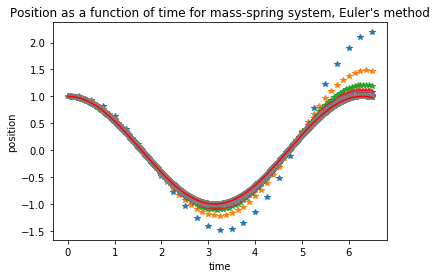

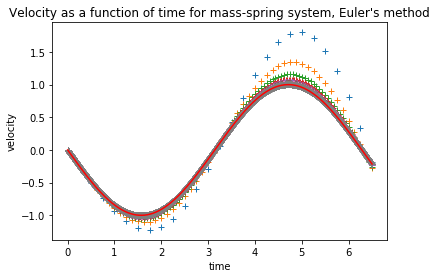

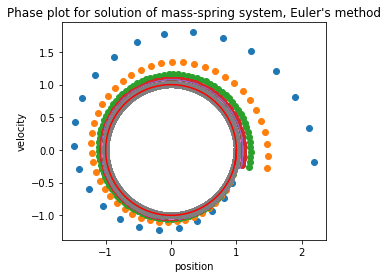

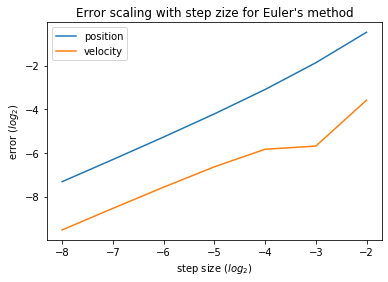

In [5]:
# 1
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#part i:
#initialization

n_soln = 8
dt0 = 0.25
x0 = 1.0
v0 = 0.0
t_final = 2 * 3.25
x_f = zeros(n_soln)
v_f = zeros(n_soln)
dt_vec = zeros(n_soln)

#part ii:

for jj in range(n_soln): # find solutions for different values of dt
    dt = dt0/2**jj
    Nsteps = int(round(t_final/dt))
    y0 = np.array([x0,v0])
    y = np.zeros((Nsteps+1,2))
    time1 = np.zeros(Nsteps+1)
    y[0,:] = y0
    dy = zeros(2)
    for i in range(Nsteps): # number of time steps to take
        dy[1] = -y[i,0] # Equation for dv/dt
        dy[0] = y[i,1] # Equation for dx/dt
        y[i+1,:] = y[i,:] + dt*dy # integrate both equations with Euler
        time1[i+1] = time1[i] + dt
        
    x_f[jj] = y[-1, 0]
    v_f[jj] = y[-1, 1]
    dt_vec[jj] = dt
    
    
    
    plt.figure(1)
    plt.plot(time1,y[:,0],'*')
    plt.figure(2)
    plt.plot(time1,y[:,1],'+')
    plt.figure(3)
    plt.plot(y[:,0],y[:,1],'o')


plt.figure(1)    
plt.plot(time1, np.cos(time1), 'r-')
plt.xlabel('time')
plt.ylabel('position')
plt.title("Position as a function of time for mass-spring system, Euler's method")
        

plt.figure(2)
plt.plot(time1, -np.sin(time1), 'r-')
plt.xlabel('time')
plt.ylabel('velocity')
plt.title("Velocity as a function of time for mass-spring system, Euler's method")


    
plt.figure(3)
plt.plot(np.cos(time1), -np.sin(time1), 'r-')
plt.xlabel('position')
plt.ylabel('velocity')
plt.title("Phase plot for solution of mass-spring system, Euler's method")
plt.gca().set_aspect('equal') ## seemingly has no effect


plt.figure(4)
plt.plot(np.log2(dt_vec[:-1]), np.log2(abs(np.diff(x_f))), label = 'position')
plt.plot(np.log2(dt_vec[:-1]), np.log2(abs(np.diff(v_f))), label = 'velocity')
plt.title("Error scaling with step zize for Euler's method")
plt.xlabel(r"step size ($log_2$)")
plt.ylabel(r"error ($log_2$)")


plt.legend()


Make a copy of the previous code and modify so that the solution uses the midpoint method instead of the Euler method.  A supplementary reference for the midpoint method is [Autar Kaw's presentation](https://www.youtube.com/watch?v=dmr_DBIr8kw).  You may also use Equations 1.42 and 1.43 in the text.  These equations replace the Euler equations in the inner loop.

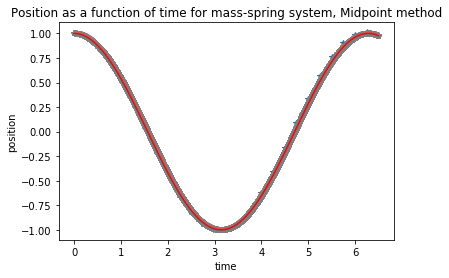

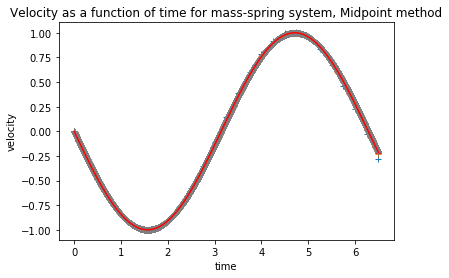

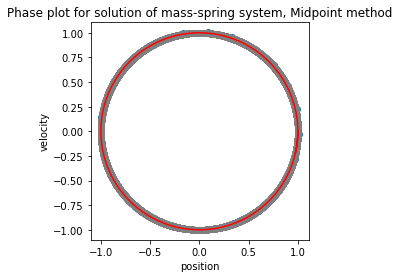

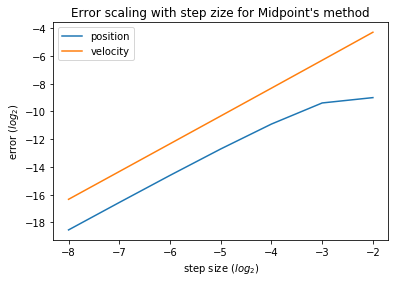

In [6]:
# 2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#part i:
#initialization

n_soln = 8
dt0 = 0.25
x0 = 1.0
v0 = 0.0
t_final = 2 * 3.25
x_f = zeros(n_soln)
v_f = zeros(n_soln)
dt_vec = zeros(n_soln)

#part ii:

for jj in range(n_soln): # find solutions for different values of dt
    dt = dt0/2**jj
    Nsteps = int(round(t_final/dt))
    y0 = np.array([x0,v0])
    y = np.zeros((Nsteps+1,2))
    time1 = np.zeros(Nsteps+1)
    y[0,:] = y0
    dy = np.zeros(2)
    dy_n_half = np.zeros(2)
    for i in range(Nsteps): # number of time steps to take
        dy[1] = -y[i,0]
        dy[0] = y[i, 1]
        y_i_plus_half = y[i,:] + (dt/2)*dy
        dy_n_half[1] = -y_i_plus_half[0] # 
        dy_n_half[0] = y_i_plus_half[1] # 
        y[i+1,:] = y[i,:] + dt*dy_n_half
        time1[i+1] = time1[i] + dt
        
    x_f[jj] = y[-1, 0]
    v_f[jj] = y[-1, 1]
    dt_vec[jj] = dt
    
    
    
    plt.figure(1)
    plt.plot(time1,y[:,0],'*')
    plt.figure(2)
    plt.plot(time1,y[:,1],'+')
    plt.figure(3)
    plt.plot(y[:,0],y[:,1],'o')


plt.figure(1)    
plt.plot(time1, np.cos(time1), 'r-')
plt.xlabel('time')
plt.ylabel('position')
plt.title("Position as a function of time for mass-spring system, Midpoint method")
        

plt.figure(2)
plt.plot(time1, -np.sin(time1), 'r-')
plt.xlabel('time')
plt.ylabel('velocity')
plt.title("Velocity as a function of time for mass-spring system, Midpoint method")


    
plt.figure(3)
plt.plot(np.cos(time1), -np.sin(time1), 'r-')
plt.xlabel('position')
plt.ylabel('velocity')
plt.title("Phase plot for solution of mass-spring system, Midpoint method")
plt.gca().set_aspect('equal') ## seemingly has no effect


plt.figure(4)
plt.plot(np.log2(dt_vec[:-1]), np.log2(abs(np.diff(x_f))), label = 'position')
plt.plot(np.log2(dt_vec[:-1]), np.log2(abs(np.diff(v_f))), label = 'velocity')
plt.title("Error scaling with step zize for Midpoint's method")
plt.xlabel(r"step size ($log_2$)")
plt.ylabel(r"error ($log_2$)")


plt.legend()



Make a copy of the previous code and modify so that the solution uses the Runge-Kutta method instead of the midpoint method.  Supplementary reference for the Runge-Kutta method are:
 - [Theoretical  derivation](https://www.youtube.com/watch?v=hGN54bkE8Ac)
 - [Worked example (part 1)](https://www.youtube.com/watch?v=AT7Olelic8U)
 - [Worked example (part 2)](https://www.youtube.com/watch?v=gzgghqto1Ws)

You may also use Equations 1.47-1.52 in the text.  These equations replace the midpoints equations in the inner loop.

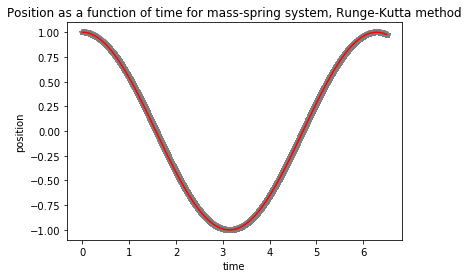

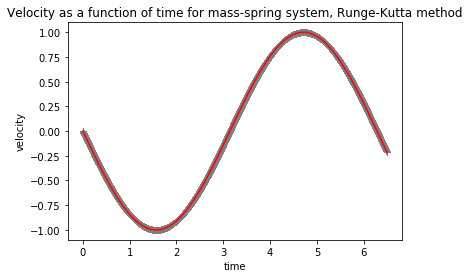

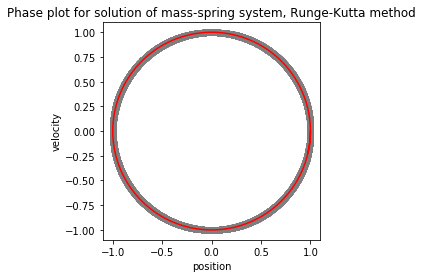

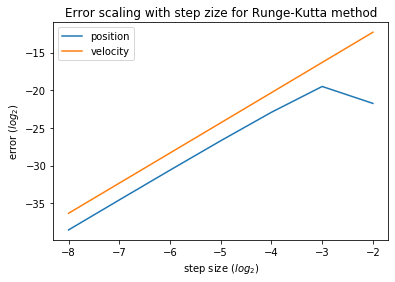

In [12]:
#3 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#part i:
#initialization

n_soln = 8
dt0 = 0.25
x0 = 1.0
v0 = 0.0
t_final = 2 * 3.25
x_f = zeros(n_soln)
v_f = zeros(n_soln)
dt_vec = zeros(n_soln)

#part ii:

for jj in range(n_soln): # find solutions for different values of dt
    dt = dt0/2**jj
    Nsteps = int(round(t_final/dt))
    y0 = np.array([x0,v0])
    y = np.zeros((Nsteps+1,2))
    time1 = np.zeros(Nsteps+1)
    y[0,:] = y0
    dy1 = np.zeros(2)
    dy2 = np.zeros(2) 
    dy3 = np.zeros(2) 
    dy4 = np.zeros(2) # Initializing dy's
    for i in range(Nsteps): # number of time steps to take
        ####Aiming to find all the k's
        
        dy1[0] = y[i, 1]
        dy1[1] = -y[i, 0]
        k1 = 1.0*dy1 ### Added 1.0 to avoid alias problem
        
        dy2[0] = y[i, 1] + (dt/2)*k1[1]
        dy2[1] = -1*(y[i, 0] + (dt/2)*k1[0]) 
        k2 = 1.0*dy2 
        
        dy3[0] = y[i, 1] + (dt/2)*k2[1]
        dy3[1] = -1*(y[i, 0] + (dt/2)*k2[0]) 
        k3 = 1.0* dy3 ### Added 1.0 to avoid alias problem
        
        dy4[0] = y[i, 1] + (dt)*k3[1] 
        dy4[1] = -1*(y[i, 0] + (dt)*k3[0])
        k4 = 1.0*dy4 ### Added 1.0 to avoid alias problem
        

        y[i+1,:] = y[i,:] + (dt/6)* (k1 + (2*k2) + (2*k3) + k4) ### runge-Kutta formala
        time1[i+1] = time1[i] + dt
        
    x_f[jj] = y[-1, 0]
    v_f[jj] = y[-1, 1]
    dt_vec[jj] = dt
    
    
    
    plt.figure(1)
    plt.plot(time1,y[:,0],'*')
    plt.figure(2)
    plt.plot(time1,y[:,1],'+')
    plt.figure(3)
    plt.plot(y[:,0],y[:,1],'o')


plt.figure(1)    
plt.plot(time1, np.cos(time1), 'r-')
plt.xlabel('time')
plt.ylabel('position')
plt.title("Position as a function of time for mass-spring system, Runge-Kutta method")
        

plt.figure(2)
plt.plot(time1, -np.sin(time1), 'r-')
plt.xlabel('time')
plt.ylabel('velocity')
plt.title("Velocity as a function of time for mass-spring system, Runge-Kutta method")


    
plt.figure(3)
plt.plot(np.cos(time1), -np.sin(time1), 'r-')
plt.xlabel('position')
plt.ylabel('velocity')
plt.title("Phase plot for solution of mass-spring system, Runge-Kutta method")
plt.gca().set_aspect('equal') ## seemingly has no effect


plt.figure(4)
plt.plot(np.log2(dt_vec[:-1]), np.log2(abs(np.diff(x_f))), label = 'position')
plt.plot(np.log2(dt_vec[:-1]), np.log2(abs(np.diff(v_f))), label = 'velocity')
plt.title("Error scaling with step zize for Runge-Kutta method")
plt.xlabel(r"step size ($log_2$)")
plt.ylabel(r"error ($log_2$)")


plt.legend()




Comment on the significance of the fourth plot for the Euler, midpoint, and Runge-Kutta methods. What do the plots show about  the relative accuracy of the different methods? 

(Put your comments here)

The fourth plot shows that the Runge-Kutta(RK) method displays a relative accuracy which is higher than than of the midpoint method. Also, the midpoint method displays a relative accuracy which is higher than than of Euler's method.
Take for example, the velocity graph: for the Runge-Kutta method the error is approximately 2^-37, compared to 2^-17 for the midpoint method and 2 ^ -7 for the Euler's method. Therefore the error for the RK method is less, than Midpoint method which is less than Euler's method.

Modify your previous script to generate a phase plot for the mass-spring system as follows:

#### Initialize:  ####

`dt = 0.05; x0 = 0.0 v0_min = 0.0; v0_max = 2.0; v0_step = 0.2; t_final = 10.0`

Create `v0`, an equally-spaced vector from `v0_min` to `v0_max` (inclusive) with step `v0_step`.

#### Calculation: ####

Loop:  `jj = 0,1,...,length(v0)-1`

For each jj, compute and plot the solution of the mass-spring system using the Runge Kutta method with initial conditions `[x0 ; v0(jj)]` on the interval `0 < t < t_final` with time step `dt`. 

#### Output: ####

This script outputs only one figure. All solutions are plotted on the same figure.  The title of the figure is: “Phase trajectories for mass-spring system”. Put appropriate labels on the x and y axis.


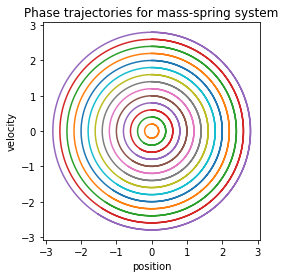

In [5]:
#4
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#part i:
#initialization

# n_soln = 8
dt = 0.05
x0 = 0.0
v0_min = 0.0
v0_max = 2.0
v0_step = 0.2
t_final = 10.0
# x_f = np.zeros(n_soln)
# v_f = np.zeros(n_soln)
# dt_vec = np.zeros(n_soln)

# v0 = np.linspace(v0_min, v0_max, t_final/v0_step)
v0 = np.arange(v0_min, v0_max+1, v0_step)

#part ii:

for jj in range(len(v0)): # find solutions for different values of dt
    Nsteps = int(round(t_final/dt))
    y0 = np.array([x0,v0[jj]])
    y = np.zeros((Nsteps+1,2))
    time1 = np.zeros(Nsteps+1)
    y[0,:] = y0
    dy1 = np.zeros(2)
    dy2 = np.zeros(2) 
    dy3 = np.zeros(2) 
    dy4 = np.zeros(2) # Initializing dy's
    for i in range(Nsteps): # number of time steps to take
        ####Aiming to find all the k's
        
        dy1[0] = y[i, 1]
        dy1[1] = -y[i, 0]
        k1 = 1.0*dy1 ### Added 1.0 to avoid alias problem
        
        dy2[0] = y[i, 1] + (dt/2)*k1[1]
        dy2[1] = -1*(y[i, 0] + (dt/2)*k1[0]) 
        k2 = 1.0*dy2 
        
        dy3[0] = y[i, 1] + (dt/2)*k2[1]
        dy3[1] = -1*(y[i, 0] + (dt/2)*k2[0]) 
        k3 = 1.0* dy3 ### Added 1.0 to avoid alias problem
        
        dy4[0] = y[i, 1] + (dt)*k3[1] 
        dy4[1] = -1*(y[i, 0] + (dt)*k3[0])
        k4 = 1.0*dy4 ### Added 1.0 to avoid alias problem
        

        y[i+1,:] = y[i,:] + (dt/6)* (k1 + (2*k2) + (2*k3) + k4) ### runge-Kutta formala
        time1[i+1] = time1[i] + dt
        
        
        
    plt.plot(y[:,0], y[:, 1])
    plt.xlabel('position')
    plt.ylabel('velocity')
    plt.title("Phase trajectories for mass-spring system")
    plt.gca().set_aspect('equal') ## seemingly has no effect

# plt.legend()




The mass-spring system satisfies equation (1.23) in the text. In the code that you have written, this single equation is re-expressed in the two equations (1.26) and (1.27).

The equation for a pendulum is similar to (1.23):
$$ \frac{d^2 \theta}{dt^2} = -k\sin(\theta), $$
where $\theta$ is the angle that the pendulum makes with the vertical direction.
This can be re-expressed in two equations similar to (1.26) and (1.27): 
$$ \frac{d\theta}{dt} = v;\quad \frac{dv}{dt} = -k\sin(\theta) $$
Modify your previous script to create a phase plot for the pendulum equation.  You may take $k=1$.  (Note that $\theta$ and $v$ are represented by $y[:,0]$ and $y[:,1]$. 

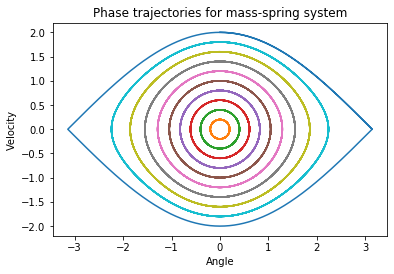

In [61]:
# 5
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#part i:
#initialization

dt = 0.01
x0 = 0 ### x or x0 represents angle {$\theta$}
k = 1.0
v0_min = 0
v0_max = 2.0
v0_step = 0.2
t_final = 60.0


# v0 = np.linspace(v0_min, v0_max, t_final/v0_step)
v0 = np.arange(v0_min, v0_max+0.1, v0_step)

#part ii:

for jj in range(len(v0)): # find solutions for different values of dt
    Nsteps = int(round(t_final/dt))
    y = np.zeros((Nsteps+1,2))
    time1 = np.zeros(Nsteps+1)
    y[0,:] = np.array([x0,v0[jj]])
    dy1 = np.zeros(2)
    dy2 = np.zeros(2) 
    dy3 = np.zeros(2) 
    dy4 = np.zeros(2) # Initializing dy's
    for i in range(Nsteps): # number of time steps to take
        ####Aiming to find all the k's
        
        dy1[0] = y[i, 1]
        dy1[1] = -k*np.sin(y[i, 0])
        #k1 = f(xi, yi), where f(xi, yi) is the derivative function. In this case f is a function of ONLY Y
        k1 = 1.0*dy1 ### Added 1.0 to avoid alias problem
        
        dy2[0] = y[i, 1] + (dt/2)*k1[1]
        dy2[1] = -k*np.sin((y[i, 0] + (dt/2)*k1[0]) )
        ### k2 = f(xi + .5h, y + .5h*k1), where h is dt(time step)
        k2 = 1.0*dy2 
        
        dy3[0] = y[i, 1] + (dt/2)*k2[1]
        dy3[1] = -k*np.sin((y[i, 0] + (dt/2)*k2[0]) )
        ### k3 = f(xi + .5h, y + .5h*k2), where h is dt(time step)
        k3 = 1.0* dy3 ### Added 1.0 to avoid alias problem
        
        dy4[0] = y[i, 1] + (dt)*k3[1] 
        dy4[1] = -k*np.sin((y[i, 0] + (dt)*k3[0]))
        ### k4 = f(xi + h, y + h*k3), where h is dt(time step). In this case f is a function of ONLY Y
        k4 = 1.0*dy4 ### Added 1.0 to avoid alias problem
        

        y[i+1,:] = y[i,:] + (dt/6)* (k1 + (2*k2) + (2*k3) + k4) ### runge-Kutta formala
        time1[i+1] = time1[i] + dt
        
        
        
    plt.plot(y[:,0], y[:, 1])
    plt.xlabel('Angle')
    plt.ylabel('Velocity')
    plt.title("Phase trajectories for mass-spring system")
    plt.gca().set_aspect('equal') ## seemingly has no effect

plt.show()


# print("y:", y)



Equation (1.56) (or 1.57)  models a pendulum with friction and an oscillatory driving force (kind of like a swing that's being pushed). A simplified version of the equation is:
$$ \frac{d^2 \theta}{dt^2} = -\sin(\theta) - k \frac{d\theta}{dt} + f \sin(\omega t) $$
In this equation, the $k \frac{d\theta}{dt}$ term is the force of friction, and the $f \sin(\omega t)$ is a periodic driving force that pushes the pendulum (like pumping a swing). The angular frequency of the driving term is $\omega$.
 - Create two separate phase plots for parameter values (k=0.1, f=0.0) and (k=0.2, f=0.0). You may want to change v0_step and t_final to get better plots. Make sure you label your plots. Give a physical explanation of what is happening--keep in mind the physical effects of the force, and of friction.  
 - Create a phase plot for parameter values ($k=0.1, f=0.5, \omega=1.0$).  Consider the following statement:  “When $f$ and $\omega$ are nonzero, the trajectories in the phase plane no longer form a flow.” (look up "flow (Mathematics) " on Wikipedia.)  Explain this statement, and explain why it is true.



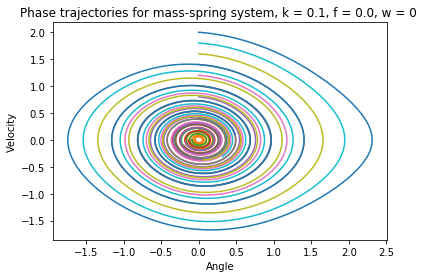

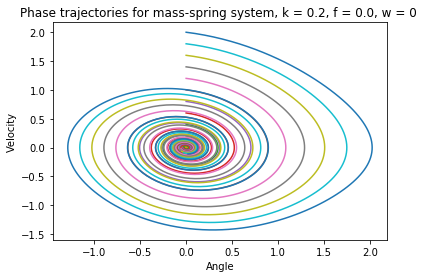

In [85]:
#6A

############## FIRST GRAPH
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#part i:
#initialization

dt = 0.05
x0 = 0 ### x or x0 represents angle {$\theta$}
k = 0.1
f = 0.0
w = 0.0
v0_min = 0
v0_max = 2.0
v0_step = 0.2
t_final = 30.0


# v0 = np.linspace(v0_min, v0_max, t_final/v0_step)
v0 = np.arange(v0_min, v0_max+0.1, v0_step)

#part ii:

for jj in range(len(v0)): # find solutions for different values of dt
    Nsteps = int(round(t_final/dt))
    y = np.zeros((Nsteps+1,2))
    time1 = 0
    y[0,:] = np.array([x0,v0[jj]])
    dy1 = np.zeros(2)
    dy2 = np.zeros(2) 
    dy3 = np.zeros(2) 
    dy4 = np.zeros(2) # Initializing dy's
    for i in range(Nsteps): # number of time steps to take
        ####Aiming to find all the k's
        
        #print('\niter:{} time:{}'.format(i,time))
        
        dy1[0] = y[i, 1]
        dy1[1] = -np.sin(y[i, 0]) - (k*y[i,1]) + (f * np.sin(w * time1))
        #k1 = f(xi, yi), where f(xi, yi) is the derivative function. In this case f is a function of ONLY Y
        k1 = 1.0*dy1 ### Added 1.0 to avoid alias problem
        
        dy2[0] = y[i, 1] + (dt/2)*k1[1]
        dy2[1] = -np.sin((y[i, 0] + (dt/2)*k1[0]) ) - (k*(y[i,1] + (dt/2)*k1[1])) + (f * np.sin(w * time1))
        ### k2 = f(xi + .5h, y + .5h*k1), where h is dt(time step)
        k2 = 1.0*dy2 
        
        dy3[0] = y[i, 1] + (dt/2)*k2[1]
        dy3[1] = -np.sin((y[i, 0] + (dt/2)*k2[0]) ) - (k*(y[i,1] + (dt/2)*k2[1])) + (f * np.sin(w * time1))
        ### k3 = f(xi + .5h, y + .5h*k2), where h is dt(time step)
        k3 = 1.0* dy3 ### Added 1.0 to avoid alias problem
        
        dy4[0] = y[i, 1] + (dt)*k3[1] 
        dy4[1] = -np.sin((y[i, 0] + (dt)*k3[0])) - (k * (y[i,1] + dt*k3[1])) + (f * np.sin(w * time1))
        ### k4 = f(xi + h, y + h*k3), where h is dt(time step). In this case f is a function of ONLY Y
        k4 = 1.0*dy4 ### Added 1.0 to avoid alias problem
        

        y[i+1,:] = y[i,:] + (dt/6)* (k1 + (2*k2) + (2*k3) + k4) ### runge-Kutta formala
        time1 = time1 + dt
        
        
        
    plt.plot(y[:,0], y[:, 1])
    plt.xlabel('Angle')
    plt.ylabel('Velocity')
    plt.title("Phase trajectories for mass-spring system, k = 0.1, f = 0.0, w = 0 ")
    #plt.gca().set_aspect('equal') ## seemingly has no effect

plt.show()


############## SECOND GRAPH

dt = 0.05
x0 = 0 ### x or x0 represents angle {$\theta$}
k = 0.2
f = 0.0
w = 0.0
v0_min = 0
v0_max = 2.0
v0_step = 0.2
t_final = 30.0


# v0 = np.linspace(v0_min, v0_max, t_final/v0_step)
v0 = np.arange(v0_min, v0_max+0.1, v0_step)

#part ii:

for jj in range(len(v0)): # find solutions for different values of dt
    Nsteps = int(round(t_final/dt))
    y = np.zeros((Nsteps+1,2))
    time1 = 0
    y[0,:] = np.array([x0,v0[jj]])
    dy1 = np.zeros(2)
    dy2 = np.zeros(2) 
    dy3 = np.zeros(2) 
    dy4 = np.zeros(2) # Initializing dy's
    for i in range(Nsteps): # number of time steps to take
        ####Aiming to find all the k's
        
        #print('\niter:{} time:{}'.format(i,time))
        
        dy1[0] = y[i, 1]
        dy1[1] = -np.sin(y[i, 0]) - (k*y[i,1]) + (f * np.sin(w * time1))
        #k1 = f(xi, yi), where f(xi, yi) is the derivative function. In this case f is a function of ONLY Y
        k1 = 1.0*dy1 ### Added 1.0 to avoid alias problem
        
        dy2[0] = y[i, 1] + (dt/2)*k1[1]
        dy2[1] = -np.sin((y[i, 0] + (dt/2)*k1[0]) ) - (k*(y[i,1] + (dt/2)*k1[1])) + (f * np.sin(w * time1))
        ### k2 = f(xi + .5h, y + .5h*k1), where h is dt(time step)
        k2 = 1.0*dy2 
        
        dy3[0] = y[i, 1] + (dt/2)*k2[1]
        dy3[1] = -np.sin((y[i, 0] + (dt/2)*k2[0]) ) - (k*(y[i,1] + (dt/2)*k2[1])) + (f * np.sin(w * time1))
        ### k3 = f(xi + .5h, y + .5h*k2), where h is dt(time step)
        k3 = 1.0* dy3 ### Added 1.0 to avoid alias problem
        
        dy4[0] = y[i, 1] + (dt)*k3[1] 
        dy4[1] = -np.sin((y[i, 0] + (dt)*k3[0])) - (k * (y[i,1] + dt*k3[1])) + (f * np.sin(w * time1))
        ### k4 = f(xi + h, y + h*k3), where h is dt(time step). In this case f is a function of ONLY Y
        k4 = 1.0*dy4 ### Added 1.0 to avoid alias problem
        

        y[i+1,:] = y[i,:] + (dt/6)* (k1 + (2*k2) + (2*k3) + k4) ### runge-Kutta formala
        time1 = time1 + dt
        
        
        
    plt.plot(y[:,0], y[:, 1])
    plt.xlabel('Angle')
    plt.ylabel('Velocity')
    plt.title("Phase trajectories for mass-spring system, k = 0.2, f = 0.0, w = 0 ")
    #plt.gca().set_aspect('equal') ## seemingly has no effect

plt.show()




# print("y:", y)




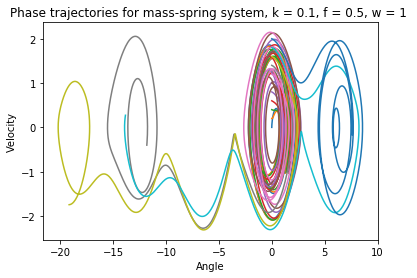

In [13]:
###6B

############## 6B
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dt = 0.05
x0 = 0 ### x or x0 represents angle {$\theta$}
k = 0.1
f = 0.5
w = 1.0
v0_min = 0
v0_max = 2.0
v0_step = 0.2
t_final = 30.0


# v0 = np.linspace(v0_min, v0_max, t_final/v0_step)
v0 = np.arange(v0_min, v0_max+0.1, v0_step)

#part ii:

for jj in range(len(v0)): # find solutions for different values of dt
    Nsteps = int(round(t_final/dt))
    y = np.zeros((Nsteps+1,2))
    time1 = 0
    y[0,:] = np.array([x0,v0[jj]])
    dy1 = np.zeros(2)
    dy2 = np.zeros(2) 
    dy3 = np.zeros(2) 
    dy4 = np.zeros(2) # Initializing dy's
    for i in range(Nsteps): # number of time steps to take
        ####Aiming to find all the k's
        
        #print('\niter:{} time:{}'.format(i,time))
        
        dy1[0] = y[i, 1]
        dy1[1] = -np.sin(y[i, 0]) - (k*y[i,1]) + (f * np.sin(w * time1))
        #k1 = f(xi, yi), where f(xi, yi) is the derivative function. In this case f is a function of ONLY Y
        k1 = 1.0*dy1 ### Added 1.0 to avoid alias problem
        
        dy2[0] = y[i, 1] + (dt/2)*k1[1]
        dy2[1] = -np.sin((y[i, 0] + (dt/2)*k1[0]) ) - (k*(y[i,1] + (dt/2)*k1[1])) + (f * np.sin(w * time1))
        ### k2 = f(xi + .5h, y + .5h*k1), where h is dt(time step)
        k2 = 1.0*dy2 
        
        dy3[0] = y[i, 1] + (dt/2)*k2[1]
        dy3[1] = -np.sin((y[i, 0] + (dt/2)*k2[0]) ) - (k*(y[i,1] + (dt/2)*k2[1])) + (f * np.sin(w * time1))
        ### k3 = f(xi + .5h, y + .5h*k2), where h is dt(time step)
        k3 = 1.0* dy3 ### Added 1.0 to avoid alias problem
        
        dy4[0] = y[i, 1] + (dt)*k3[1] 
        dy4[1] = -np.sin((y[i, 0] + (dt)*k3[0])) - (k * (y[i,1] + dt*k3[1])) + (f * np.sin(w * time1))
        ### k4 = f(xi + h, y + h*k3), where h is dt(time step). In this case f is a function of ONLY Y
        k4 = 1.0*dy4 ### Added 1.0 to avoid alias problem
        

        y[i+1,:] = y[i,:] + (dt/6)* (k1 + (2*k2) + (2*k3) + k4) ### runge-Kutta formala
        time1 = time1 + dt
        
        
        
    plt.plot(y[:,0], y[:, 1])
    plt.xlabel('Angle')
    plt.ylabel('Velocity')
    plt.title("Phase trajectories for mass-spring system, k = 0.1, f = 0.5, w = 1 ")
    #plt.gca().set_aspect('equal') ## seemingly has no effect

plt.show()






When modeling a system, it is important to understand how the different system parameters affect the behavior of the system. In this section you will plot multiple trajectories of the damped pendulum equation  on the same plot. All trajectories will be the same, except one coefficient will be different. In this way, you isolate the effect of that particular coefficient on the behavior of the system

You may have to adjust the values of `t_final` and the spacing between parameter values in order to show clearly the behavior.  

 - On a single graph, generate a set of trajectories that shows the change in behavior as `k` increases (with `f`=0). For your initial conditions, use `x0=0.0, v0 = 3.0`.  Use a `for` loop to generate and plot the different values of `k`. Give a physical explanation of  what’s going on.
 - 	On a single graph, generate a set of trajectories that shows the change in behavior as `f` increases (with `k=0.1` and `w = 1.0`). For your initial conditions, use `x0=0.0, v0 = 0.0`.  Use a for loop to generate and plot the different values of `k`. Give a physical explanation of  what’s going on.


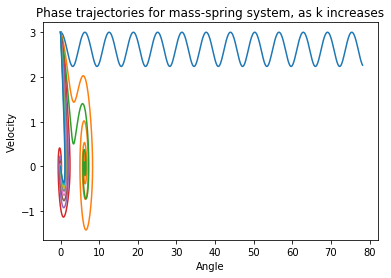

Physical Explanation: It appears that as k increases the mass moves to pi radians(180 degrees) and then 
 tilts over. The blue line in the graph shows where this happened.


In [11]:
# (Put your code here)
###7a

############## 7A
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dt = 0.05
x0 = 0 ### x or x0 represents angle {$\theta$}
# k = 0.1
f = 0.0
w = 0.0
v0 = 3.0
k0_min = 0
k0_max = 2.0
k0_step = 0.2
t_final = 30.0


# v0 = np.linspace(v0_min, v0_max, t_final/v0_step)
k0 = np.arange(k0_min, k0_max+0.1, k0_step)

#part ii:

for jj in range(len(k0)): # find solutions for different values of dt
    Nsteps = int(round(t_final/dt))
    y = np.zeros((Nsteps+1,2))
    time1 = 0
    y[0,:] = np.array([x0,v0])
    dy1 = np.zeros(2)
    dy2 = np.zeros(2) 
    dy3 = np.zeros(2) 
    dy4 = np.zeros(2) # Initializing dy's
    for i in range(Nsteps): # number of time steps to take
        ####Aiming to find all the k's
        
        #print('\niter:{} time:{}'.format(i,time))
        
        dy1[0] = y[i, 1]
        dy1[1] = -np.sin(y[i, 0]) - (k0[jj]*y[i,1]) + (f * np.sin(w * time1))
        #k1 = f(xi, yi), where f(xi, yi) is the derivative function. In this case f is a function of ONLY Y
        k1 = 1.0*dy1 ### Added 1.0 to avoid alias problem
        
        dy2[0] = y[i, 1] + (dt/2)*k1[1]
        dy2[1] = -np.sin((y[i, 0] + (dt/2)*k1[0]) ) - (k0[jj]*(y[i,1] + (dt/2)*k1[1])) + (f * np.sin(w * time1))
        ### k2 = f(xi + .5h, y + .5h*k1), where h is dt(time step)
        k2 = 1.0*dy2 
        
        dy3[0] = y[i, 1] + (dt/2)*k2[1]
        dy3[1] = -np.sin((y[i, 0] + (dt/2)*k2[0]) ) - (k0[jj]*(y[i,1] + (dt/2)*k2[1])) + (f * np.sin(w * time1))
        ### k3 = f(xi + .5h, y + .5h*k2), where h is dt(time step)
        k3 = 1.0* dy3 ### Added 1.0 to avoid alias problem
        
        dy4[0] = y[i, 1] + (dt)*k3[1] 
        dy4[1] = -np.sin((y[i, 0] + (dt)*k3[0])) - (k0[jj] * (y[i,1] + dt*k3[1])) + (f * np.sin(w * time1))
        ### k4 = f(xi + h, y + h*k3), where h is dt(time step). In this case f is a function of ONLY Y
        k4 = 1.0*dy4 ### Added 1.0 to avoid alias problem
        

        y[i+1,:] = y[i,:] + (dt/6)* (k1 + (2*k2) + (2*k3) + k4) ### runge-Kutta formala
        time1 = time1 + dt
        
        
        
    plt.plot(y[:,0], y[:, 1])
    plt.xlabel('Angle')
    plt.ylabel('Velocity')
    plt.title("Phase trajectories for mass-spring system, as k increases")
    #plt.gca().set_aspect('equal') ## seemingly has no effect

plt.show()


print("Physical Explanation: It appears that as k increases the mass moves to pi radians(180 degrees) and then \n tilts over. The blue line in the graph shows where this happened.")

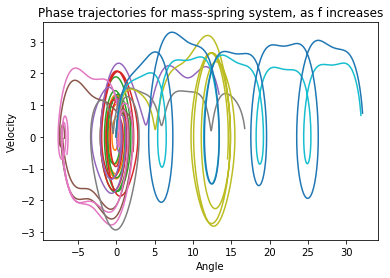

As f, the periodic driving force increases it seems the trajectory spirals out into a 3 dimensional figure.


In [10]:
# (Put your code here)
###7b

############## 7b            

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dt = 0.05
x0 = 0 ### x or x0 represents angle {$\theta$}
k0 = 0.1
# f = 0.0
w = 1.0
v0 = 0.0
f0_min = 0
f0_max = 2.0
f0_step = 0.2
t_final = 30.0


# v0 = np.linspace(v0_min, v0_max, t_final/v0_step)
f0 = np.arange(f0_min, f0_max+0.1, f0_step)

#part ii:

for jj in range(len(f0)): # find solutions for different values of dt
    Nsteps = int(round(t_final/dt))
    y = np.zeros((Nsteps+1,2))
    time1 = 0
    y[0,:] = np.array([x0,v0])
    dy1 = np.zeros(2)
    dy2 = np.zeros(2) 
    dy3 = np.zeros(2) 
    dy4 = np.zeros(2) # Initializing dy's
    for i in range(Nsteps): # number of time steps to take
        ####Aiming to find all the k's
        
        #print('\niter:{} time:{}'.format(i,time))
        
        dy1[0] = y[i, 1]
        dy1[1] = -np.sin(y[i, 0]) - (k0*y[i,1]) + (f0[jj] * np.sin(w * time1))
        #k1 = f(xi, yi), where f(xi, yi) is the derivative function. In this case f is a function of ONLY Y
        k1 = 1.0*dy1 ### Added 1.0 to avoid alias problem
        
        dy2[0] = y[i, 1] + (dt/2)*k1[1]
        dy2[1] = -np.sin((y[i, 0] + (dt/2)*k1[0]) ) - (k0*(y[i,1] + (dt/2)*k1[1])) + (f0[jj] * np.sin(w * time1))
        ### k2 = f(xi + .5h, y + .5h*k1), where h is dt(time step)
        k2 = 1.0*dy2 
        
        dy3[0] = y[i, 1] + (dt/2)*k2[1]
        dy3[1] = -np.sin((y[i, 0] + (dt/2)*k2[0]) ) - (k0*(y[i,1] + (dt/2)*k2[1])) + (f0[jj] * np.sin(w * time1))
        ### k3 = f(xi + .5h, y + .5h*k2), where h is dt(time step)
        k3 = 1.0* dy3 ### Added 1.0 to avoid alias problem
        
        dy4[0] = y[i, 1] + (dt)*k3[1] 
        dy4[1] = -np.sin((y[i, 0] + (dt)*k3[0])) - (k0 * (y[i,1] + dt*k3[1])) + (f0[jj] * np.sin(w * time1))
        ### k4 = f(xi + h, y + h*k3), where h is dt(time step). In this case f is a function of ONLY Y
        k4 = 1.0*dy4 ### Added 1.0 to avoid alias problem
        
        

        y[i+1,:] = y[i,:] + (dt/6)* (k1 + (2*k2) + (2*k3) + k4) ### runge-Kutta formala
        time1 = time1 + dt
        
        
        
    plt.plot(y[:,0], y[:, 1])
    plt.xlabel('Angle')
    plt.ylabel('Velocity')
    plt.title("Phase trajectories for mass-spring system, as f increases")
    #plt.gca().set_aspect('equal') ## seemingly has no effect

plt.show()

print("As f, the periodic driving force increases it seems the trajectory spirals out into a 3 dimensional figure.")